In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns

%matplotlib inline

In [20]:
def getBinaryData():
    Y = []
    X = []
    first = True
    for line in open('fer2013.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            y = int(row[0])
            if y == 0 or y == 1:
                Y.append(y)
                X.append([int(p) for p in row[1].split()])
    return np.array(X) / 255.0, np.array(Y)

In [21]:
X, Y = getBinaryData()

In [52]:
class LogisticModel(object):
    def __init__(self):
        pass
    
    def fit(self, X, Y, learning_rate=10e-7, reg=0, epochs=120000, show_fig=False):
        X, Y = shuffle(X, Y)
        
        #Split X and Y into training and validation sets
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]
        
        N, D = X.shape
        self.W = np.random.randn(D) / np.sqrt(D)
        self.b = 0
        
        costs = []
        best_validation_error = 1
        
        # loop through the number of epochs
        for i in range(epochs):
            pY = self.forward(X)
            
            #gradient descent step with regularization
            self.W -= learning_rate*(X.T.dot(pY - Y) + reg*self.W)
            self.b -= learning_rate*((pY - Y).sum() + reg*self.b)
            
            if i % 20 == 0:
                pYvalid = self.forward(Xvalid)
                c = self.sigmoid_cost(Yvalid, pYvalid)
                costs.append(c)
                e = self.error_rate(Yvalid, np.round(pYvalid))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
                
        print("best_validation_error:", best_validation_error)
        
        if show_fig:
            plt.plot(costs)
            plt.show()
            
    def forward(self, X):
        return self.sigmoid(X.dot(self.W) + self.b)
    
    def sigmoid(self, A):
        return 1 / (1 + np.exp(-A))
    
    def sigmoid_cost(self, T, Y):
        return -(T*np.log(Y) + (1-T)*np.log(1-Y)).sum()
    
    def error_rate(self, targets, predictions):
        return np.mean(targets != predictions)
    
    def predict(self, X):
        pY = self.forward(X)
        return np.round(pY)
    
    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)

In [35]:
unique, counts = np.unique(Y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 4953]
 [   1  547]]


In [48]:
# Now we balance the classes
X0 = X[Y==0,:]
X1 = X[Y==1, :]
X1 = np.repeat(X1, 9, axis=0)
X = np.vstack([X0, X1])
Y = np.array([0]*len(X0) + [1]*len(X1))

i: 0 cost: 779.14729609 error: 0.492
i: 20 cost: 685.037332296 error: 0.439
i: 40 cost: 684.052556239 error: 0.448
i: 60 cost: 683.226936649 error: 0.445
i: 80 cost: 682.423078305 error: 0.436
i: 100 cost: 681.641952356 error: 0.428
i: 120 cost: 680.881759052 error: 0.428
i: 140 cost: 680.140809494 error: 0.428
i: 160 cost: 679.417640477 error: 0.432
i: 180 cost: 678.71098712 error: 0.424
i: 200 cost: 678.019753616 error: 0.418
i: 220 cost: 677.342988014 error: 0.415
i: 240 cost: 676.679860684 error: 0.412
i: 260 cost: 676.029645988 error: 0.411
i: 280 cost: 675.391706662 error: 0.408
i: 300 cost: 674.765480541 error: 0.403
i: 320 cost: 674.150469267 error: 0.396
i: 340 cost: 673.546228709 error: 0.391
i: 360 cost: 672.952360822 error: 0.389
i: 380 cost: 672.368506752 error: 0.384
i: 400 cost: 671.794340988 error: 0.383
i: 420 cost: 671.229566415 error: 0.382
i: 440 cost: 670.67391013 error: 0.384
i: 460 cost: 670.127119899 error: 0.384
i: 480 cost: 669.588961175 error: 0.382
i: 500 co

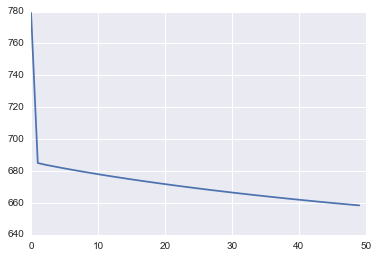

In [58]:
# Now createa  model
model = LogisticModel()
model.fit(X, Y, show_fig=True, epochs=1000, learning_rate=10e-8)